In [8]:
#Accessing the dataset

In [32]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv('./Data/meme.csv')

In [34]:
df.head().T

,0,1,2,3,4
ID,4,5,14,28,72
BillingType,recurring,recurring,recurring,recurring,recurring
Status,active,disabled,active,active,disabled
Category,person,person,person,person,person
DateAdd,2019-01-03,2019-01-11,2019-01-12,2019-02-01,2019-02-19
MrrTotal,26000.0,0.0,26000.0,0.0,0.0
Quantity,1,1,1,1,1
ServicesStartDate,2021-07-01,2021-07-01,2019-01-14,2019-01-23,2019-01-31
ServicesStatus,active,active,hidden,hidden,hidden
ServiceName,FTTH 15,FTTH 15,FTTH 25,FTTH 15,FTTH 15


In [35]:
df.shape

(7968, 12)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7968 entries, 0 to 7967
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7968 non-null   int64  
 1   BillingType        7968 non-null   object 
 2   Status             7966 non-null   object 
 3   Category           7968 non-null   object 
 4   DateAdd            7968 non-null   object 
 5   MrrTotal           7968 non-null   float64
 6   Quantity           7968 non-null   int64  
 7   ServicesStartDate  7968 non-null   object 
 8   ServicesStatus     7968 non-null   object 
 9   ServiceName        7968 non-null   object 
 10  Price              7968 non-null   int64  
 11  Locations          7968 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 747.1+ KB


In [37]:
#Data Pre processing and preparation

In [38]:
df.columns = df.columns.str.lower()
df.head().T

,0,1,2,3,4
id,4,5,14,28,72
billingtype,recurring,recurring,recurring,recurring,recurring
status,active,disabled,active,active,disabled
category,person,person,person,person,person
dateadd,2019-01-03,2019-01-11,2019-01-12,2019-02-01,2019-02-19
mrrtotal,26000.0,0.0,26000.0,0.0,0.0
quantity,1,1,1,1,1
servicesstartdate,2021-07-01,2021-07-01,2019-01-14,2019-01-23,2019-01-31
servicesstatus,active,active,hidden,hidden,hidden
servicename,FTTH 15,FTTH 15,FTTH 25,FTTH 15,FTTH 15


In [39]:
df.dtypes

id                     int64
billingtype           object
status                object
category              object
dateadd               object
mrrtotal             float64
quantity               int64
servicesstartdate     object
servicesstatus        object
servicename           object
price                  int64
locations             object
dtype: object

In [40]:
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print(col+'-->', df_[col].unique()) # to print categories name only

billingtype--> ['recurring']
status--> ['active' 'disabled' 'blocked' nan 'new']
category--> ['person' 'company']
dateadd--> ['2019-01-03' '2019-01-11' '2019-01-12' ... '2022-11-08' '2022-11-09'
 '2022-11-10']
servicesstartdate--> ['2021-07-01' '2019-01-14' '2019-01-23' '2019-01-31' '2021-09-01'
 '2022-02-20' '2021-11-01' '2019-02-22' '2019-03-01' '2019-02-28'
 '2021-08-01' '2019-03-11' '2019-03-12' '2019-03-18' '2019-03-19'
 '2019-03-21' '2019-03-23' '2019-03-26' '2019-03-28' '2019-03-29'
 '2019-03-30' '2019-04-01' '2019-04-05' '2019-04-04' '2019-05-06'
 '2019-04-18' '2019-04-19' '2019-04-20' '2019-04-22' '2019-04-23'
 '2019-04-27' '2019-04-29' '2019-04-30' '2019-05-03' '2019-05-07'
 '2019-05-09' '2019-05-10' '2019-05-15' '2019-05-11' '2019-05-20'
 '2019-05-21' '2019-05-22' '2019-05-25' '2019-05-31' '2019-05-27'
 '2019-05-30' '2019-06-03' '2019-06-04' '2019-06-06' '2019-06-10'
 '2019-06-12' '2020-12-01' '2019-06-14' '2019-06-18' '2019-06-20'
 '2019-06-21' '2019-06-24' '2019-06-26' '20

In [41]:
df['dateadd'].unique()

array(['2019-01-03', '2019-01-11', '2019-01-12', ..., '2022-11-08',
       '2022-11-09', '2022-11-10'], dtype=object)

In [42]:
df

,id,billingtype,status,category,dateadd,mrrtotal,quantity,servicesstartdate,servicesstatus,servicename,price,locations
0,4,recurring,active,person,2019-01-03,26000.0,1,2021-07-01,active,FTTH 15,26000,PYAY-CITY-FTTH
1,5,recurring,disabled,person,2019-01-11,0.0,1,2021-07-01,active,FTTH 15,26000,PYAY-CITY-FTTH
2,14,recurring,active,person,2019-01-12,26000.0,1,2019-01-14,hidden,FTTH 25,42000,PYAY-CITY-FTTH
3,28,recurring,active,person,2019-02-01,0.0,1,2019-01-23,hidden,FTTH 15,26000,APN - Thilawa SEZ
4,72,recurring,disabled,person,2019-02-19,0.0,1,2019-01-31,hidden,FTTH 15,26000,PYAY-CITY-FTTH
...,...,...,...,...,...,...,...,...,...,...,...,...
7963,16763,recurring,active,person,2022-11-10,0.0,1,2021-10-01,hidden,FTTH 15,26000,APN - Golden City
7964,16766,recurring,new,person,2022-11-10,0.0,1,2021-10-01,hidden,FTTH 15,26000,PYAY-CITY-FTTH
7965,16767,recurring,new,person,2022-11-10,0.0,1,2021-10-01,active,FTTH 15,26000,PYAY-CITY-FTTH
7966,16768,recurring,new,person,2022-11-10,0.0,1,2021-08-01,disabled,FTTH 20,26000,APN - Golden City


In [43]:
first_prch_date = df.groupby(['id']).agg({
                                                'dateadd' : 'min'
                                                })
first_prch_date.columns = ['first_prch_date']

first_prch_date = first_prch_date[['first_prch_date']]
first_prch_date.reset_index(inplace=True)
first_prch_date.head()

,id,first_prch_date
0,4,2019-01-03
1,5,2019-01-11
2,14,2019-01-12
3,28,2019-02-01
4,72,2019-02-19


In [44]:
df['servicesstatus'].unique()

array(['active', 'hidden', 'disabled', 'stopped'], dtype=object)

In [45]:
#columns_to_convert = ['servicesstatus']

#df['servicesstatus'].replace(to_replace='active', value=1, inplace=True)
#df['servicesstatus'].replace(to_replace='hidden',  value=2, inplace=True)
#df['servicesstatus'].replace(to_replace='disabled', value=3, inplace=True)
#df['servicesstatus'].replace(to_replace='stopped',  value=4, inplace=True)
#df.head()

#df.servicesstatus.unique()

In [46]:
df.dtypes

id                     int64
billingtype           object
status                object
category              object
dateadd               object
mrrtotal             float64
quantity               int64
servicesstartdate     object
servicesstatus        object
servicename           object
price                  int64
locations             object
dtype: object

In [47]:
df.isnull().sum(axis = 0)

id                   0
billingtype          0
status               2
category             0
dateadd              0
mrrtotal             0
quantity             0
servicesstartdate    0
servicesstatus       0
servicename          0
price                0
locations            0
dtype: int64

In [48]:
df = df.fillna(value=0)

In [54]:
churners_number = len(df[df['servicesstatus'] == 'hidden'])
print("Number of churners", churners_number)

churners = (df[df['servicesstatus'] == 'hidden'])

non_churners = df[df['servicesstatus'] != 'hidden'].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
df2 = churners.append(non_churners)

Number of churners 3495
Number of non-churners 3495


/tmp/ipykernel_58875/3586145947.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = churners.append(non_churners)


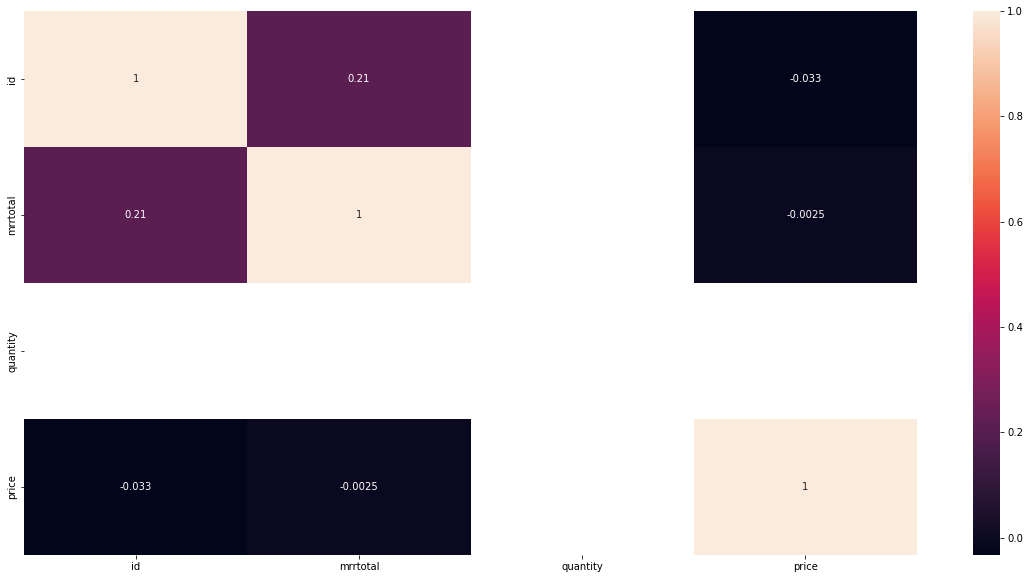

In [55]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(df2,show_chart=True)

In [60]:
try:
    customer_id = df2['id'] # Store this as customer_id variable
    del df2['id'] # Don't need in ML DF
except:
    print("already removed customerID")

already removed customerID


In [57]:
df2.head()

,billingtype,status,category,dateadd,mrrtotal,quantity,servicesstartdate,servicesstatus,servicename,price,locations
2,recurring,active,person,2019-01-12,26000.0,1,2019-01-14,hidden,FTTH 25,42000,PYAY-CITY-FTTH
3,recurring,active,person,2019-02-01,0.0,1,2019-01-23,hidden,FTTH 15,26000,APN - Thilawa SEZ
4,recurring,disabled,person,2019-02-19,0.0,1,2019-01-31,hidden,FTTH 15,26000,PYAY-CITY-FTTH
5,recurring,active,person,2019-02-25,42000.0,1,2019-01-31,hidden,FTTH 15,26000,APN - San Chaung Garden
9,recurring,active,person,2019-03-08,26000.0,1,2022-02-20,hidden,FTTH 25,42000,PYAY-CITY-FTTH


In [58]:
ml_dummies = pd.get_dummies(df2)
ml_dummies.fillna(value=0, inplace=True)
ml_dummies.head()

,mrrtotal,quantity,price,billingtype_recurring,status_0,status_active,status_blocked,status_disabled,status_new,category_company,...,locations_Uni - Pazundaung,locations_Uni - Sanchaung,locations_Uni - South Dagon,locations_Uni - South Oakkala,locations_Uni - Tamwe,locations_Uni - Thar Kay Ta,locations_Uni - Thingangyun,locations_Uni - Yankin,locations_YGN-DC1-DIA,locations_YGN-DIA
2,26000.0,1,42000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1,26000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1,26000,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,42000.0,1,26000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,26000.0,1,42000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

In [65]:
show_correlations(ml_dummies, show_chart=False)["servicesstatus_hidden"].sort_values(ascending=False)

servicesstatus_hidden           1.000000
servicename_FTTH 15             0.205153
servicesstartdate_2021-02-05    0.135543
price                           0.128398
servicesstartdate_2021-06-02    0.118932
                                  ...   
servicename_LK-BI-Global-100   -0.189779
servicesstatus_active          -0.551898
servicesstatus_disabled        -0.554986
quantity                             NaN
billingtype_recurring                NaN
Name: servicesstatus_hidden, Length: 2010, dtype: float64

<Figure size 1440x720 with 0 Axes>

In [68]:
try:
    label = ml_dummies['servicesstatus_hidden'] # Remove the label before training the model
    del ml_dummies['servicesstatus_hidden']
except:
    print("label already removed.")

KNeighborsClassifier
0.596 
 - - - - -  

DecisionTreeClassifier
1.0 
 - - - - -  



<AxesSubplot:ylabel='features'>

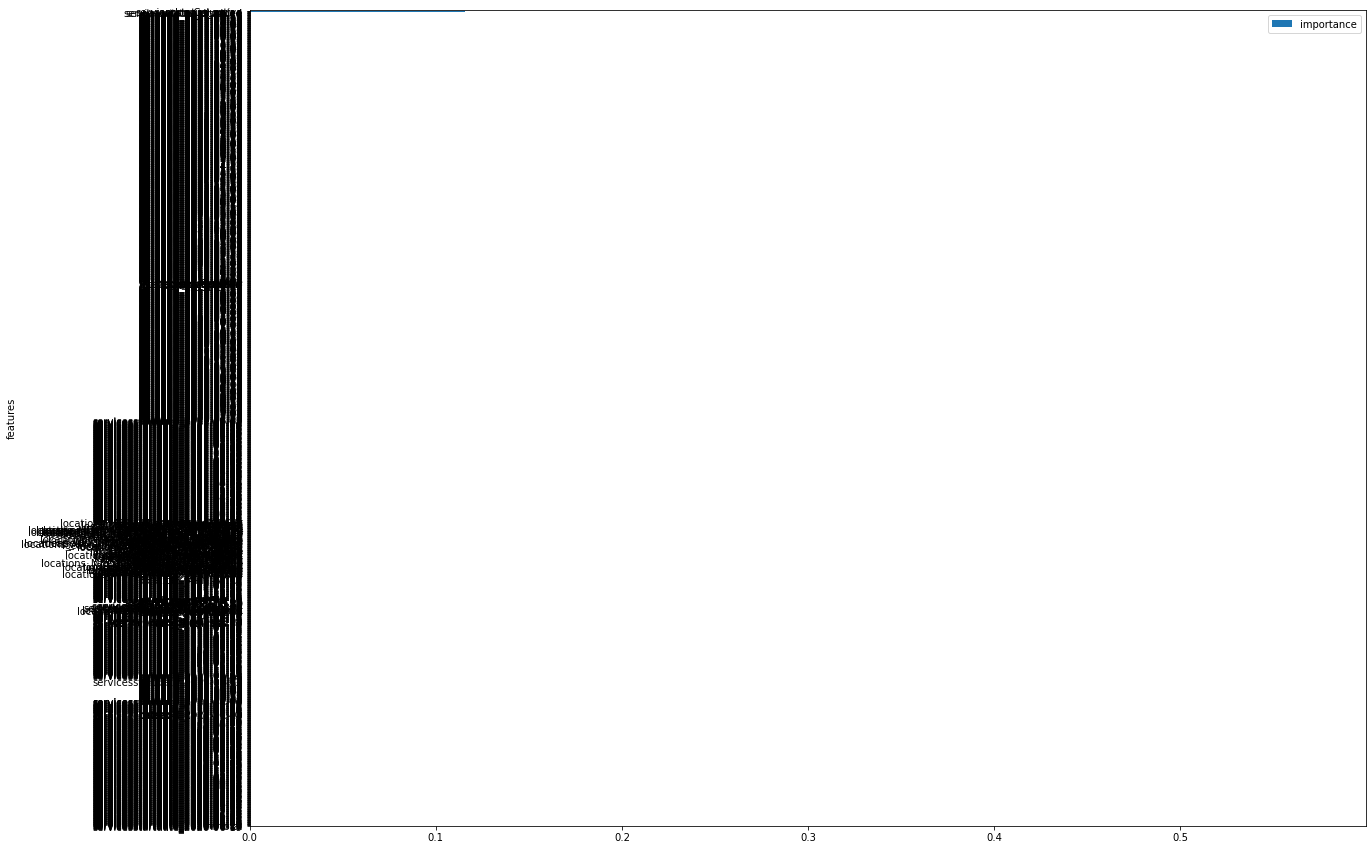

In [69]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(ml_dummies, label, test_size=0.3)

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5)
]
    

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(feature_train, label_train)
    pred = clf.predict(feature_test)
    score = clf.score(feature_test, label_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
feature_df = pd.DataFrame()
feature_df['features'] = ml_dummies.columns
feature_df['importance'] = clf.feature_importances_
feature_df.sort_values(by='importance', ascending=False)    
feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))

Confusion matrix, without normalization
[[1086    0]
 [   0 1011]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


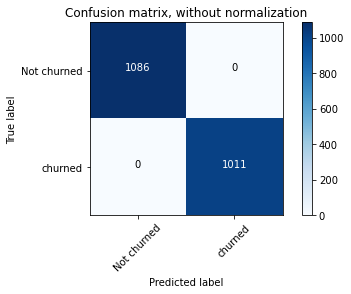

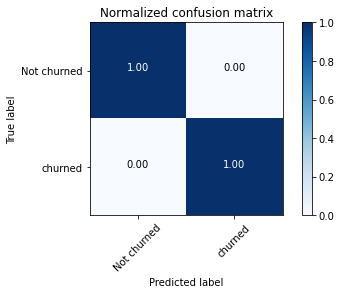

              precision    recall  f1-score   support

 Not churned       1.00      1.00      1.00      1086
     churned       1.00      1.00      1.00      1011

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



In [70]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(label_test, pred, target_names=class_names)
print(eval_metrics)

In [73]:
from sklearn.model_selection import GridSearchCV

max_depth_range = range(2,20,2)
leaf_range = range(1,10,2)
n_estimators_range = range(10,200,10)
max_features_range = range(1,len(ml_dummies.columns),5)


param_grid = dict(max_depth = max_depth_range,
                 min_samples_leaf = leaf_range,
                 n_estimators = n_estimators_range,
                 max_features = max_features_range
                )

In [74]:
def preprocess_df(dataframe):
    x = dataframe.copy()
    try:
        customer_id = x['id']
        del x['id'] # Don't need in ML DF
    except:
        print("already removed customerID")
    ml_dummies = pd.get_dummies(x)
    ml_dummies.fillna(value=0, inplace=True)

    # import random done above
    ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

    try:
        label = ml_dummies['servicesstatus_hidden']
        del ml_dummies['servicesstatus_hidden']
    except:
        print("label already removed.")
    return ml_dummies, customer_id, label

original_df = preprocess_df(df)

In [79]:
output_df = original_df[0].copy()
output_df['---randomColumn---']
output_df['prediction'] = clf.predict_proba(output_df)[:,1]
output_df['churn'] = original_df[2]
output_df['customerID'] = original_df[1]

/home/lillian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dateadd_2019-05-02
- dateadd_2019-05-29
- dateadd_2019-10-10
- dateadd_2019-12-19
- dateadd_2020-01-11
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 2041 features, but DecisionTreeClassifier is expecting 2009 features as input.

In [80]:
print('Mean predict proba of churn:',round(output_df[output_df['churn'] == 1]['prediction'].mean(),2))
print('Mean predict proba of NON-churn:',round(output_df[output_df['churn'] == 0]['prediction'].mean(),2))

KeyError: 'churn'

In [ ]:
activate = output_df[output_df['churn'] == 0]
activate[['customerID','churn','prediction']]